In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress
import numpy as np

Read data from file

In [2]:
df = pd.read_csv('epa-sea-level.csv', index_col = 'Year')
df.info() #there is no null year

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 1880 to 2013
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CSIRO Adjusted Sea Level  134 non-null    float64
 1   Lower Error Bound         134 non-null    float64
 2   Upper Error Bound         134 non-null    float64
 3   NOAA Adjusted Sea Level   21 non-null     float64
dtypes: float64(4)
memory usage: 5.2 KB


Create scatter plot

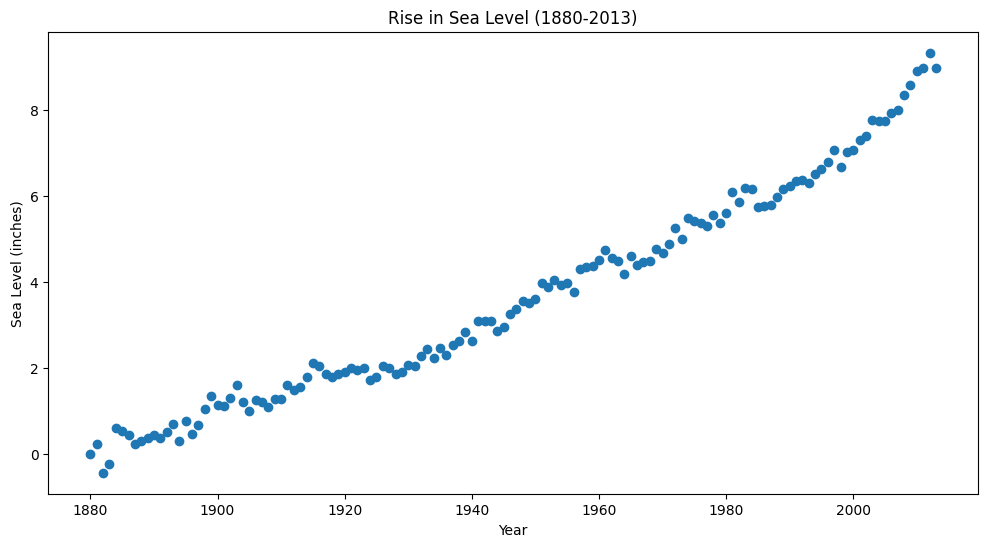

In [3]:
x = df.index.values
y = df['CSIRO Adjusted Sea Level'].values

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.set_title('Rise in Sea Level (1880-2013)')

plt.show()

Create first line of best fit

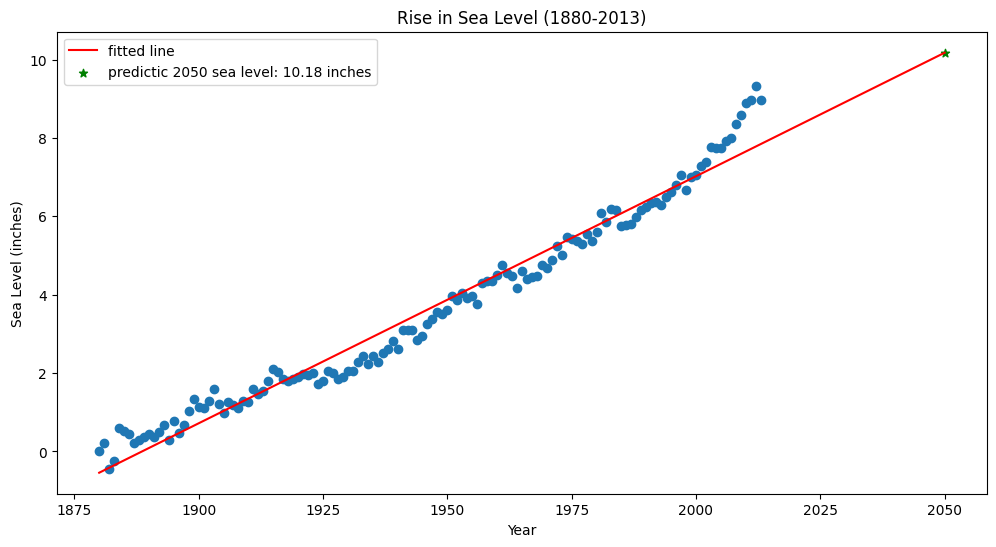

In [4]:
x = np.append(df.index.values, 2050)
y = np.append(df['CSIRO Adjusted Sea Level'].values, None)
res = linregress(df.index, df['CSIRO Adjusted Sea Level'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

predictic_2050 = res.intercept + res.slope*2050
ax.scatter(2050, predictic_2050, marker='*', color='g', label=f'predictic 2050 sea level: {round(predictic_2050,2)} inches')
ax.legend(loc='best')
ax.set_title('Rise in Sea Level (1880-2013)')

plt.show()

Create second line of best fit

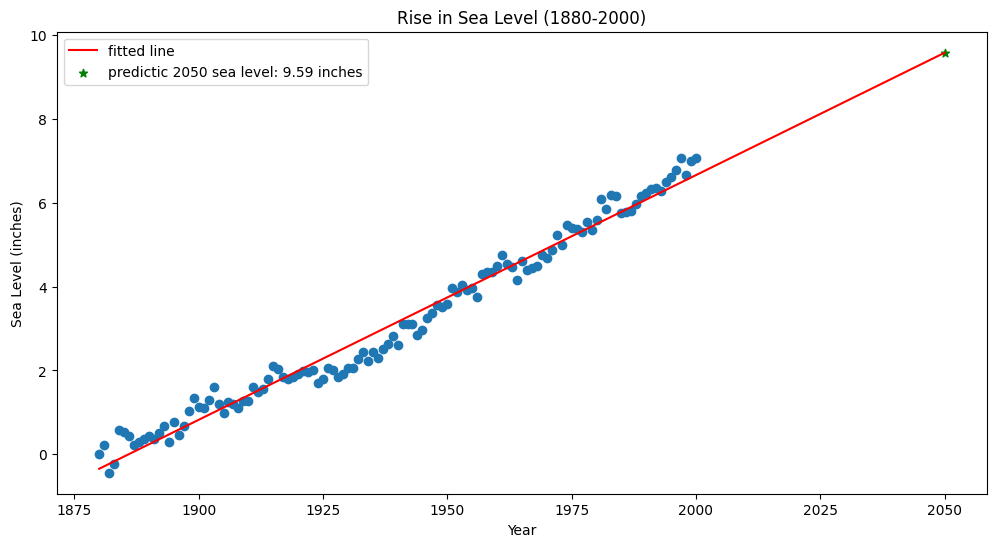

In [5]:
df_v2 = df[df.index <= 2000]
x = np.append(df_v2.index.values, 2050)
y = np.append(df_v2['CSIRO Adjusted Sea Level'].values, None)
res = linregress(df_v2.index, df_v2['CSIRO Adjusted Sea Level'])

fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(x, y)
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level (inches)')
ax.plot(x, res.intercept + res.slope*x, 'r', label='fitted line')

predictic_2050_v2 = res.intercept + res.slope*2050
ax.scatter(2050, predictic_2050_v2, marker='*', color='g', label=f'predictic 2050 sea level: {round(predictic_2050_v2,2)} inches')
ax.legend(loc='best')
ax.set_title('Rise in Sea Level (1880-2000)')

plt.show()